In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor

## 1) Загрузить цветное (RGB) изображение I в формате без потери информации, например, bmp, png или tiff, и показать его на экране;

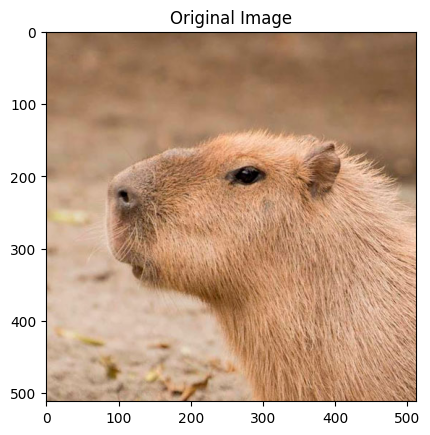

In [3]:
image = cv2.imread('../example_image.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.show()

In [4]:
image.shape

(512, 512, 3)

## 2) Отобразить ч/б представление изображения и три его цветовых составляющих и их гистограммы яркости;

In [5]:
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
grayscale.shape

(512, 512)

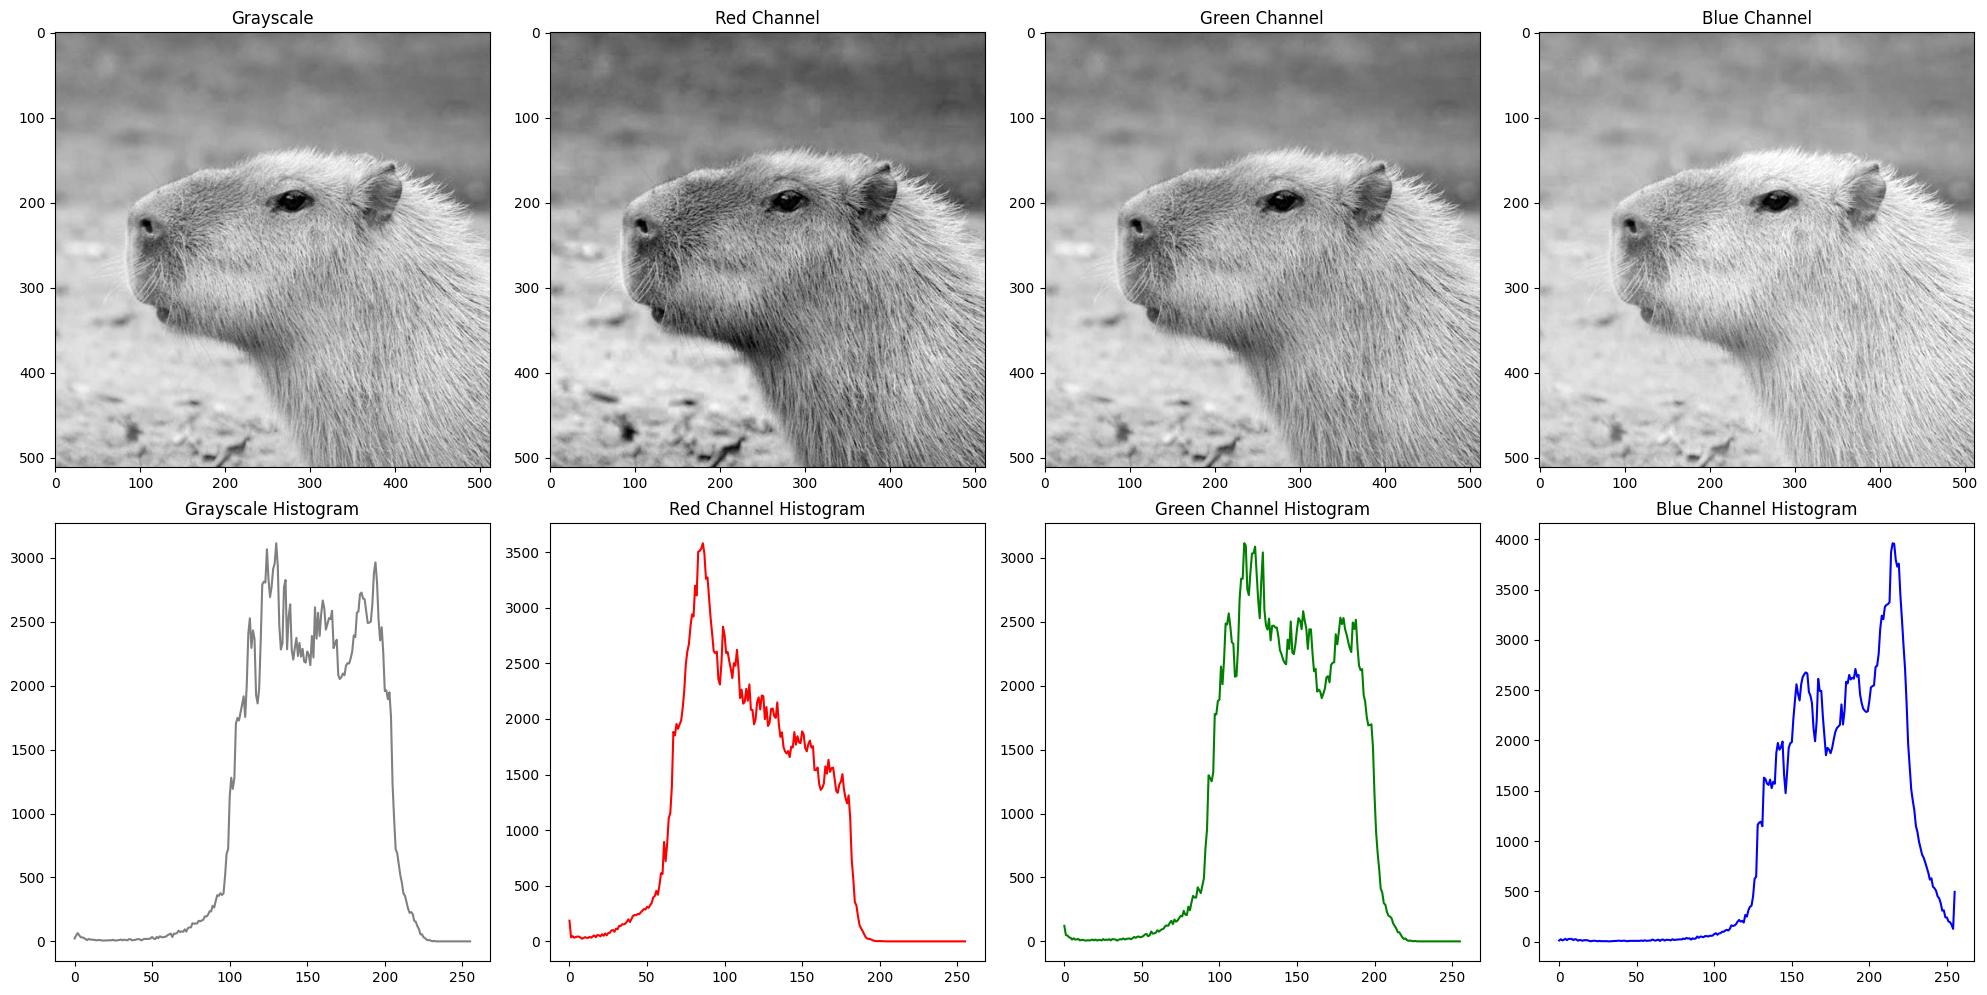

In [7]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax[0, 0].imshow(grayscale, cmap='gray')
ax[0, 0].set_title('Grayscale')
color_titles = ['Red Channel', 'Green Channel', 'Blue Channel']

for i, color in enumerate(cv2.split(image)):
    ax[0, i+1].imshow(color, cmap='gray')
    ax[0, i+1].set_title(color_titles[i])

hist = cv2.calcHist([grayscale], [0], None, [256], [0, 256])
ax[1, 0].plot(hist, color='gray')
ax[1, 0].set_title('Grayscale Histogram')

colors = ['r', 'g', 'b']
for i, color in enumerate(cv2.split(image)):
    hist = cv2.calcHist([color], [0], None, [256], [0, 256])
    ax[1, i+1].plot(hist, color=colors[i])
    ax[1, i+1].set_title(f'{color_titles[i]} Histogram')

plt.tight_layout()
plt.show()

In [10]:
import cv2
import numpy as np

def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        img_copy = image.copy()
        
        top_left = (max(x-5, 0), max(y-5, 0))
        bottom_right = (min(x+6, image.shape[1]-1), min(y+6, image.shape[0]-1))
        
        cv2.rectangle(img_copy, (top_left[0]-1, top_left[1]-1), (bottom_right[0]+1, bottom_right[1]+1), (0, 255, 0), 1)
        
        pixel_value = image[y, x]
        intensity = np.mean(pixel_value)
        window = image[max(y-5, 0):min(y+6, image.shape[0]), max(x-5, 0):min(x+6, image.shape[1])]
        mean = np.mean(window)
        std = np.std(window)
        
        print(f"Coords: ({x},{y}) | RGB: {pixel_value} | Intensity: {intensity:.2f} | Mean: {mean:.2f} | Std: {std:.2f}")
        
        cv2.imshow("Image", img_copy)
        
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", mouse_callback)

if image is None:
    print("Ошибка загрузки изображения. Проверьте путь к файлу.")
else:
    cv2.namedWindow("Image")
    cv2.setMouseCallback("Image", mouse_callback)

    cv2.imshow("Image", image_rgb)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Coords: (378,1) | RGB: [ 81 105 141] | Intensity: 109.00 | Mean: 109.51 | Std: 25.44
Coords: (378,1) | RGB: [ 81 105 141] | Intensity: 109.00 | Mean: 109.51 | Std: 25.44
Coords: (378,1) | RGB: [ 81 105 141] | Intensity: 109.00 | Mean: 109.51 | Std: 25.44
Coords: (375,12) | RGB: [ 82 112 147] | Intensity: 113.67 | Mean: 113.77 | Std: 26.88
Coords: (370,33) | RGB: [ 90 120 155] | Intensity: 121.67 | Mean: 120.44 | Std: 26.81
Coords: (362,55) | RGB: [ 73 103 138] | Intensity: 104.67 | Mean: 105.96 | Std: 26.65
Coords: (356,79) | RGB: [ 75 108 148] | Intensity: 110.33 | Mean: 112.57 | Std: 29.16
Coords: (347,106) | RGB: [ 97 127 168] | Intensity: 130.67 | Mean: 129.64 | Std: 29.66
Coords: (343,123) | RGB: [102 132 167] | Intensity: 133.67 | Mean: 133.33 | Std: 26.80
Coords: (338,139) | RGB: [110 141 180] | Intensity: 143.67 | Mean: 143.32 | Std: 31.52
Coords: (334,148) | RGB: [163 200 252] | Intensity: 205.00 | Mean: 184.19 | Std: 40.96
Coords: (331,156) | RGB: [179 210 249] | Intensity: 2